In [1]:
#! uv pip install pandas
#! uv pip install numpy
#! uv pip install matplotlib
#! uv pip install scikit-learn
#! uv pip install networkx

In [85]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = '../data/archive/'

In [4]:
os.path.getsize('../data/archive/Competitions.csv')

84221005

In [5]:
datasets = os.listdir(data_path)

In [6]:
filesizes = []
data = []
data_columns = []
for ds in datasets:
    filepath = os.path.join(data_path, ds)
    fsize = os.path.getsize(filepath)
    filesizes.append(fsize)
    df = pd.read_csv(filepath, nrows=10)
    data.append(df)
    data_columns.append(df.columns.to_list())

In [7]:
dataset_dict = {'dataset':datasets, 'size': filesizes, 'df': data, 'cols': data_columns}

In [8]:
meta_datasets = pd.DataFrame(dataset_dict).sort_values('size')

In [9]:
exploded_metadatasets = meta_datasets[['dataset','cols']].explode('cols')
exploded_metadatasets[~exploded_metadatasets.cols.isin(['Id', 'CreationDate'])].cols.value_counts()

cols
Title                7
UserId               7
TotalVotes           5
ForumId              5
KernelVersionId      5
                    ..
SubmissionId         1
InitialConfidence    1
InitialScore         1
UpdatedConfidence    1
UpdatedScore         1
Name: count, Length: 198, dtype: int64

In [10]:
#exploded_metadatasets

In [11]:
def get_information(nb, head=5):
    print(dataset_dict['dataset'][nb])
    return dataset_dict['df'][nb].head(head)

In [12]:
def replace_id_to_correct_info(nb):
    replace_id = dataset_dict['dataset'][nb].split('.')[0][::-1].replace('s', 'dI', 1)[::-1]
    dataset_dict['df'][nb].rename(columns={'Id': replace_id}, inplace=True)

In [13]:
for i in range(len(dataset_dict['dataset'])):
    replace_id_to_correct_info(i)

In [14]:
appending_datasets = {}
for i in range(len(dataset_dict['dataset'])):
    string_dataset = dataset_dict['dataset'][i]
    df = dataset_dict['df'][i]
    appending_datasets[string_dataset] = df.columns[df.columns.str.contains('Id')].to_list()

In [60]:
dataset_cols = pd.Series(appending_datasets).reset_index().explode(0).rename(columns={'index': 'dataset', 0:'id_column'})
dataset_cols_filtered = dataset_cols[dataset_cols.id_column.isin(dataset_cols.id_column.value_counts()[dataset_cols.id_column.value_counts() > 1].index)]


In [65]:
dataset_cols_filtered[dataset_cols_filtered.id_column.str.contains('Submitted')]

,dataset,id_column
5,DatasetTaskSubmissions.csv,SubmittedUserId
33,Submissions.csv,SubmittedUserId


In [93]:
dataset_cols_filtered = dataset_cols

In [94]:
dataset_cols_filtered = dataset_cols_filtered[~dataset_cols_filtered.dataset.str.lower().str.contains('kernel')]
dataset_cols_filtered = dataset_cols_filtered[~dataset_cols_filtered.dataset.str.lower().str.contains('forum')]
dataset_cols_filtered = dataset_cols_filtered[~dataset_cols_filtered.dataset.str.lower().str.contains('model')]
dataset_cols_filtered = dataset_cols_filtered[dataset_cols_filtered.id_column.isin(dataset_cols_filtered.id_column.value_counts()[dataset_cols_filtered.id_column.value_counts() > 1].index)]
dataset_cols_filtered.id_column = dataset_cols_filtered.id_column.str.replace('Owner', '')
dataset_cols_filtered.id_column = dataset_cols_filtered.id_column.str.replace('Creator', '')
dataset_cols_filtered.id_column = dataset_cols_filtered.id_column.str.replace('Author', '')
dataset_cols_filtered.id_column = dataset_cols_filtered.id_column.str.replace('From', '')
dataset_cols_filtered.id_column = dataset_cols_filtered.id_column.str.replace('Submitted', '')

In [95]:
g = nx.from_pandas_edgelist(dataset_cols_filtered, source='dataset', target='id_column')

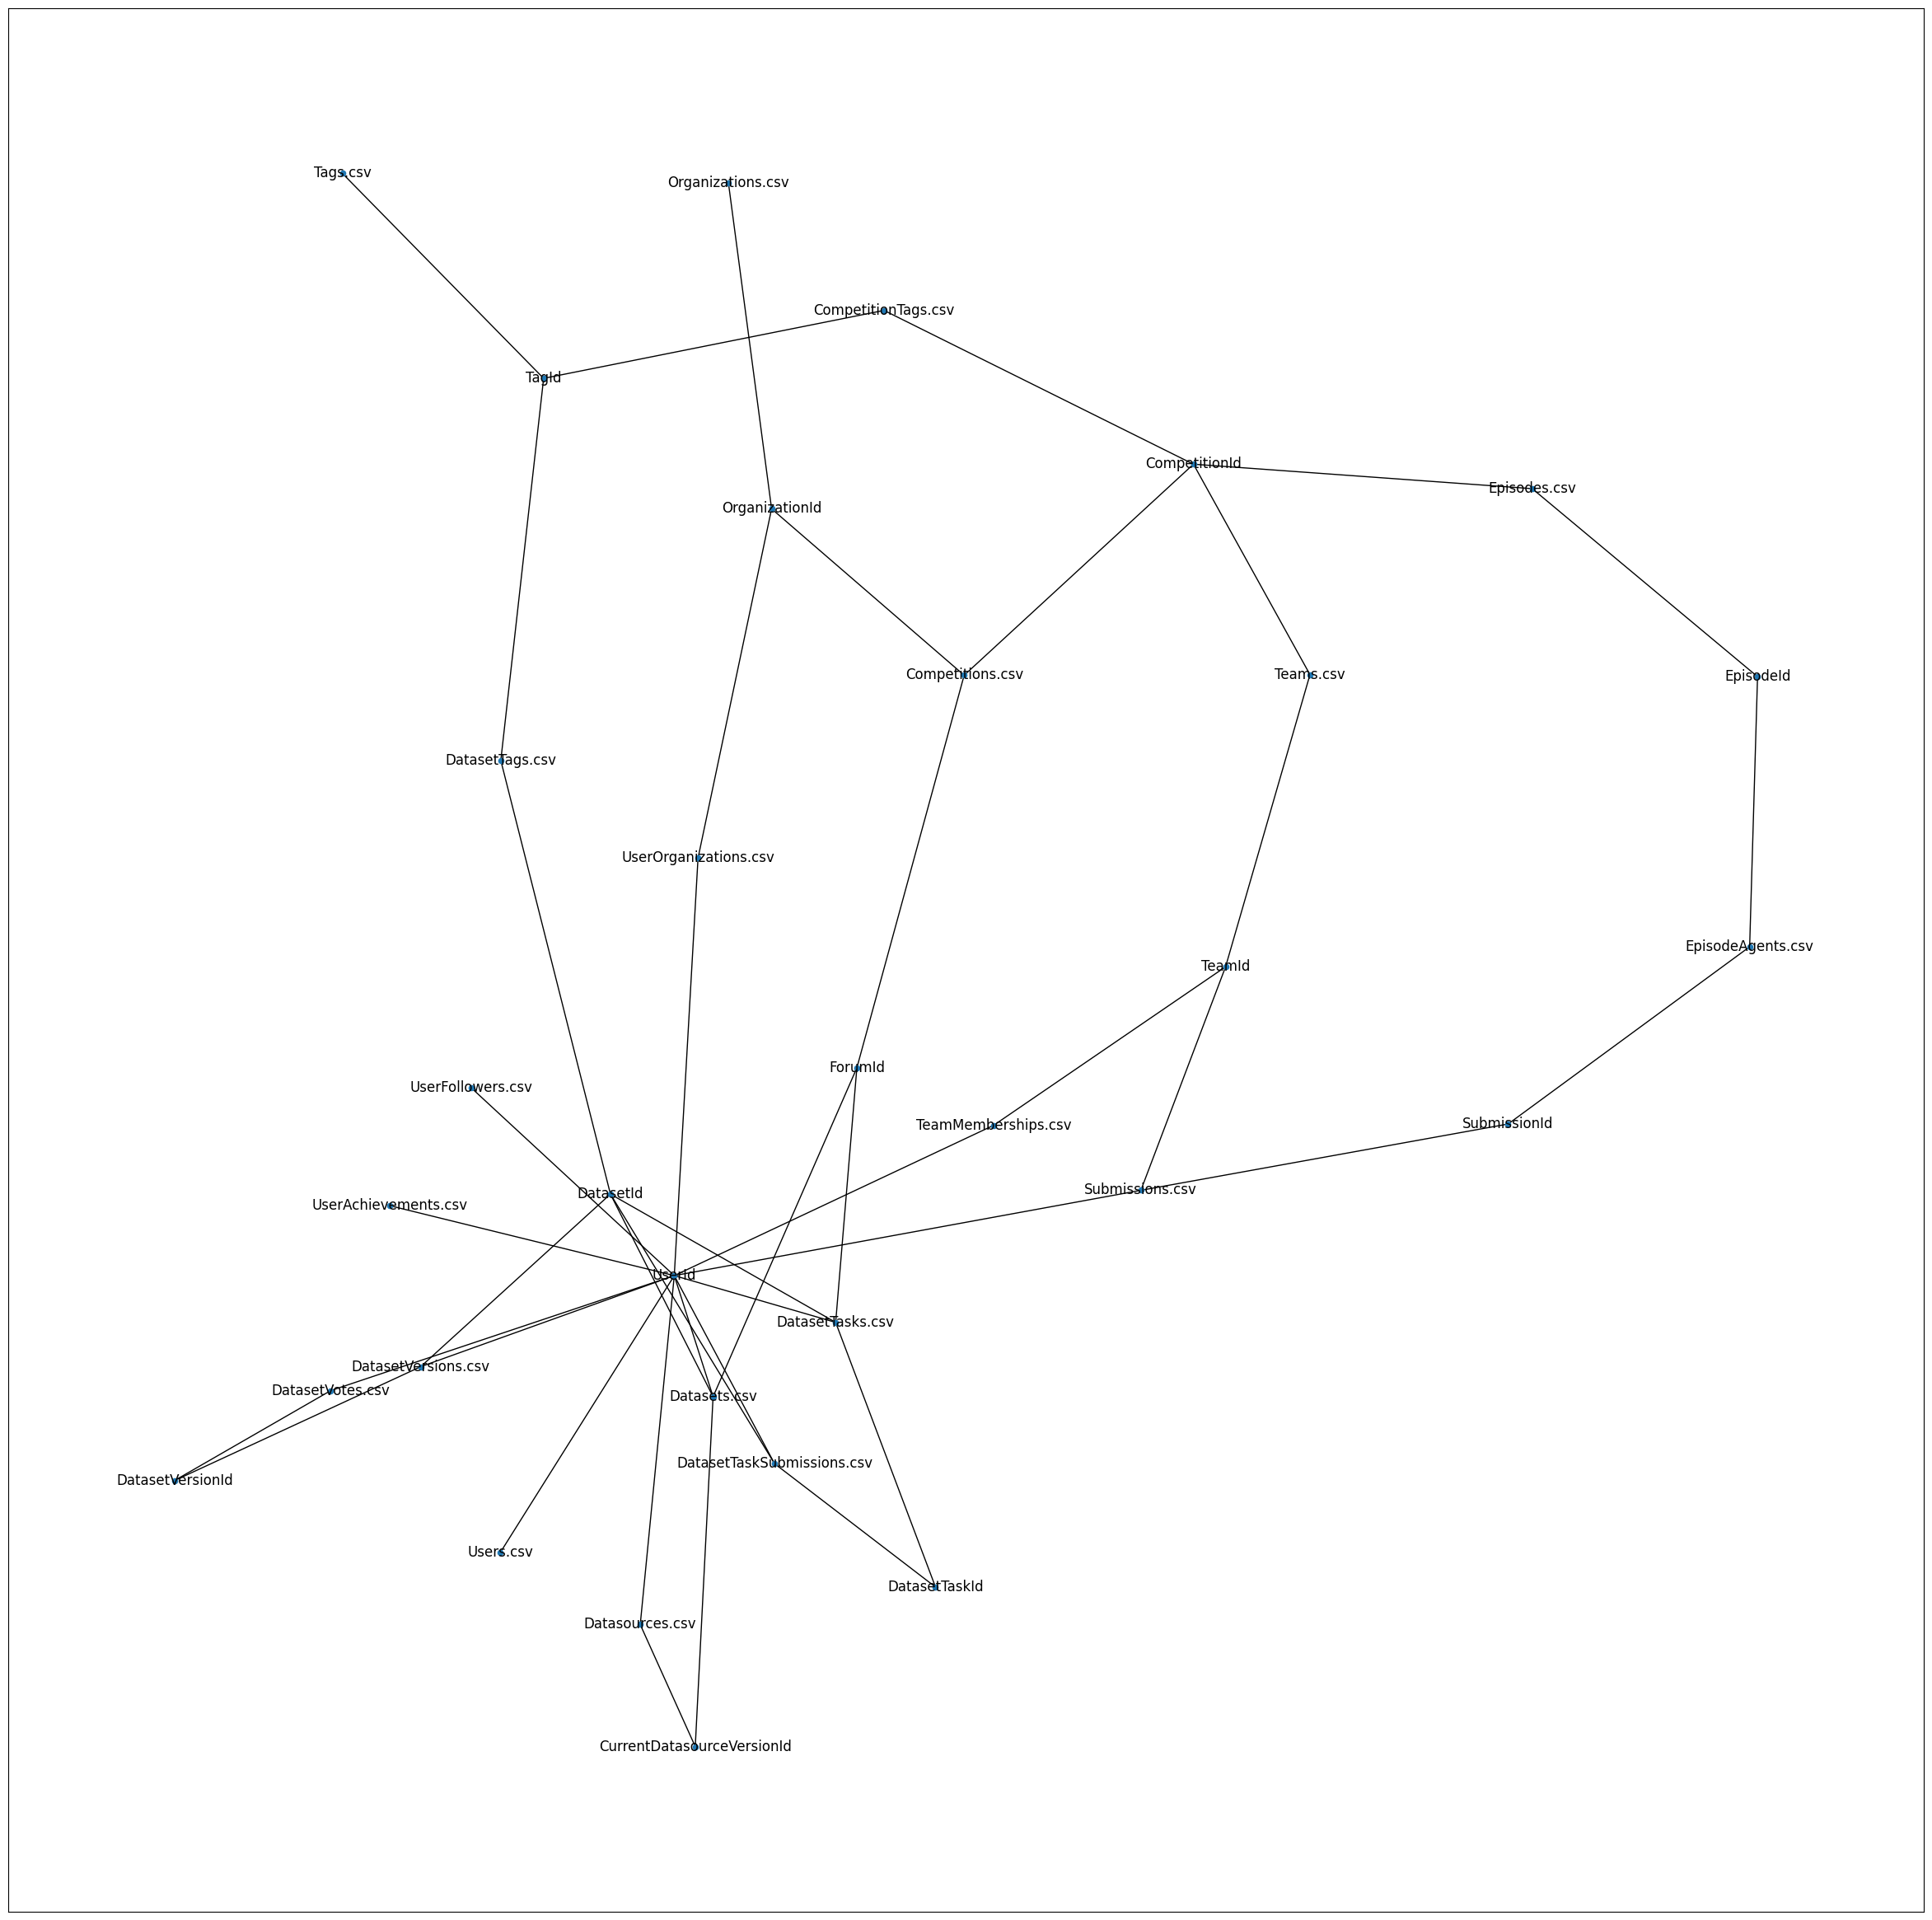

In [96]:
pos = nx.spring_layout(g)
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(g, pos=pos, node_size=20)
nx.draw_networkx_edges(g, pos=pos, node_size=20)
nx.draw_networkx_labels(g, pos=pos)
plt.savefig('../assets/kaggle-data-network.png')
plt.show()

In [76]:
competition = pd.read_csv('../data/archive/Competitions.csv')

In [80]:
competition.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'LicenseName', 'Overview',
       'Rules', 'DatasetDescription', 'TotalCompressedBytes',
       'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValu

In [100]:
pd.set_option('display.max_columns', 100)

In [101]:
competition[competition.TotalCompetitors == 0]

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,ScoreTruncationNumDecimals,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,LicenseName,Overview,Rules,DatasetDescription,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,3094129.0,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,NaN,NaN,NaN,True,True,False,False,10,5,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,5,5,20,False,False,USD,100.0,1,0.5,False,0,0,0,Subject to Competition Rules,# Hints\n\n<p><br /><b>The investment banks</b...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,10401.0,10401.0,NaN,NaN,False,False,NaN,1
54,2935,pf2012,Practice Fusion Analyze This! 2012 - Predictio...,Start digging into electronic health records a...,Featured,132.0,NaN,06/07/2012 16:11:58,06/30/2012 23:59:00,NaN,NaN,NaN,NaN,True,False,False,False,30,5,RMSE,Root Mean Squared Error,Square root of the average of the squared errors.,False,2,5,20,False,False,USD,10500.0,3,1.0,False,0,0,0,Subject to Competition Rules,"# Description\n\n<div class=""x_left-col""><img ...",# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p><em><strong>The da...,NaN,NaN,NaN,NaN,False,False,NaN,1
56,2954,pf2012-at,Practice Fusion Analyze This! 2012 - Open Chal...,Start digging into electronic health records a...,Featured,133.0,NaN,06/07/2012 16:12:23,09/10/2012 23:59:59,NaN,NaN,NaN,NaN,True,False,False,False,30,5,RMSE,Root Mean Squared Error,Square root of the average of the squared errors.,False,2,5,20,False,False,USD,10000.0,1,1.0,False,0,0,0,Subject to Competition Rules,"# Description\n\n<div class=""x_x_x_x_x_x_x_x_x...",# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p><em><strong>The da...,NaN,NaN,NaN,NaN,False,False,NaN,1
72,3090,harvard-business-review-vision-statement-prospect,Harvard Business Review 'Vision Statement' Pro...,Your Analysis and/or Visualization featured in...,Featured,155.0,NaN,08/18/2012 16:22:15,08/27/2012 04:00:00,NaN,NaN,NaN,NaN,True,True,False,False,30,5,RMSE,Root Mean Squared Error,Square root of the average of the squared errors.,False,2,5,20,False,False,USD,2500.0,1,1.0,False,0,0,0,Subject to Competition Rules,# Prizes\n\n<p>Winning Analysis and Viz to be ...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>There are two file...,22918463.0,10660940.0,NaN,NaN,False,False,NaN,1
74,3112,cir-prospect,Follow the Money: Investigative Reporting Pros...,"Find hidden patterns, connections, and ultimat...",Featured,165.0,NaN,09/14/2012 15:27:10,10/15/2012 23:59:00,NaN,NaN,NaN,NaN,True,True,False,False,30,5,RMSE,Root Mean Squared Error,Square root of the average of the squared errors.,False,2,5,20,False,False,USD,1000.0,1,1.0,False,0,0,0,Subject to Competition Rules,# Description\n\n<p>The most expensive politic...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>FEC Itemized campa...,135719580.0,135719580.0,NaN,NaN,False,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664,104550,ml-nomads-downscaling

In [107]:
non_0_competition = competition[competition.TotalCompetitors != 0].set_index('Id')

In [110]:
competition[competition.TotalCompetitors == 0].set_index('Id').HostSegmentTitle.value_counts()

HostSegmentTitle
Community     1404
Analytics       24
Featured        11
Research         3
Playground       1
Name: count, dtype: int64

In [109]:
non_0_competition.HostSegmentTitle.value_counts()

HostSegmentTitle
Community          7589
Featured            284
Research            174
Playground          143
Getting Started      18
Recruitment          17
Analytics             1
Name: count, dtype: int64

In [113]:
users = pd.read_csv('../data/archive/Users.csv')

In [140]:
users.drop('LocationSharingOptOut', axis=1, inplace=True)
users.set_index('Id', inplace=True)

In [141]:
users.Country.value_counts(dropna=False)

Country
NaN                                  23140922
United States                          390656
India                                  264275
China                                   50941
United Kingdom                          39654
                                       ...   
Aragon                                      1
South Sulawesi                              1
Falkland Islands (Islas Malvinas)           1
Nauru                                       1
Saint Martin                                1
Name: count, Length: 275, dtype: int64

In [142]:
users[users.UserName=='dhdzmota']

,UserName,DisplayName,RegisterDate,PerformanceTier,Country
Id,,,,,
1892411,dhdzmota,Daniel Hernández Mota,05/08/2018,1,Mexico


In [128]:
user_followers = pd.read_csv('../data/archive/UserFollowers.csv')

In [145]:
user_followers[user_followers.UserId==1892411]

,Id,UserId,FollowingUserId,CreationDate
264076,656152,1892411,6492962,01/09/2021
264077,288498,1892411,3331088,07/19/2019
265561,656153,1892411,4622967,01/09/2021
893794,1927343,1892411,12408312,04/07/2025


In [151]:
users.loc[4622967]

UserName            diegorodea
DisplayName        Diego Rodea
RegisterDate        03/07/2020
PerformanceTier              0
Country                 Mexico
Name: 4622967, dtype: object

In [153]:
datasets = pd.read_csv('../data/archive/Datasets.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 130


/tmp/ipykernel_12474/3191857171.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets = pd.read_csv('../data/archive/Datasets.csv')


In [154]:
datasets

,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate
0,402034,2188609,2188609.0,NaN,771250.0,792478.0,414197,Dataset,10/31/2019 01:07:32,10/31/2019,2667,127,1,2,NaN,NaN
1,402031,3792299,3792299.0,NaN,771247.0,792475.0,414194,Dataset,10/31/2019 00:58:15,10/31/2019,1774,35,2,3,NaN,NaN
2,39875,1,1891177.0,NaN,285978.0,298457.0,48350,Dataset,08/01/2018 00:10:55,08/01/2018,7487,0,16,2,NaN,NaN
3,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,251528,47028,403,452,1.0,08/05/2021
4,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,529502,97243,900,495,1.0,06/29/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489787,7593225,27235297,27235297.0,NaN,12063696.0,12588605.0,8054143,Dataset,06/05/2025 01:13:21,06/05/2025,3,0,0,0,NaN,NaN
489788,7593301,27235740,27235740.0,NaN,12063798.0,12588729.0,8054236,Dataset,06/05/2025 01:36:21,06/05/2025,7,1,0,0,NaN,NaN
489789,7593631,27236804,27236804.0,NaN,12064309.0,12589292.0,8054603,Dataset,06/05/2025 02:58:12,06/05/2025,6,0,0,1,NaN,NaN
489790,7594122,27237720,27237720.0,NaN,12065082.0,12590136.0,8055155,Dataset,06/05/2025 04:23:30,06/05/2025,6,0,0,0,NaN,NaN


In [157]:
datasets.Medal.value_counts()

Medal
3.0    24609
2.0     4697
1.0     1686
Name: count, dtype: int64

In [158]:
dataset_votes = pd.read_csv('../data/archive/DatasetVotes.csv')

In [159]:
dataset_votes

,Id,UserId,DatasetVersionId,VoteDate
0,888748,6876647,7651,03/06/2021
1,878512,5628274,7651,02/25/2021
2,858521,6696307,7651,02/10/2021
3,861763,6316275,7651,02/12/2021
4,860608,6708856,7651,02/11/2021
...,...,...,...,...
2213073,4146718,27171996,12024655,06/01/2025
2213074,4146921,26744881,12025724,06/01/2025
2213075,4147370,4512670,12025724,06/01/2025
2213076,4151207,26449696,12047007,06/03/2025


In [161]:
dataset_votes.DatasetVersionId.value_counts()

DatasetVersionId
2314697     50204
23498       10959
23812        6956
618          6426
928135       5431
            ...  
11994532        1
11994522        1
11994377        1
11995917        1
11966026        1
Name: count, Length: 252700, dtype: int64

In [163]:
dataset_votes[dataset_votes.DatasetVersionId==618]

,Id,UserId,DatasetVersionId,VoteDate
40666,418568,4464626,618,02/17/2020
40667,418994,4506015,618,02/17/2020
40668,418502,4483173,618,02/16/2020
40669,418541,4353085,618,02/17/2020
40670,418396,4483383,618,02/16/2020
...,...,...,...,...
2140089,4112510,20669922,618,05/16/2025
2140090,4118716,26932348,618,05/19/2025
2140091,4118111,18173707,618,05/18/2025
2140092,4118267,26928956,618,05/19/2025


In [164]:
datasets[datasets.CurrentDatasetVersionId==618]

,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate
5112,284,462330,462330.0,NaN,618.0,618.0,1788,Dataset,10/26/2016 08:17:30,02/06/2018,2469931,690078,6431,1794,1.0,11/06/2019


In [165]:
dataset_versions = pd.read_csv('../data/archive/DatasetVersions.csv')

In [167]:
dataset_versions[dataset_versions.DatasetId==618]

,Id,DatasetId,DatasourceVersionId,CreatorUserId,LicenseName,CreationDate,VersionNumber,Title,Slug,Subtitle,Description,VersionNotes,TotalCompressedBytes,TotalUncompressedBytes
16977,1171,618,1171,853943,Unknown,01/03/2017 22:01:13,1.0,Titanic,TitanicDataset,compare Above 18 years of male and female betw...,# Context \n\nI am planning to compare Above 1...,Initial release,452657.0,452657.0


In [ ]:
# Objective: You might like...
# Check these new datasets.